In [1]:
!pip install keras lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=fe8ed9bd66a1d0be9e0ceebfd94bd65d14a201b809a012216034b6bf7c81c53d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
# Import libraries
import keras
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image

In [3]:
# Load your model
model_path = "/content/drive/MyDrive/Client : Parth Canada Files*/Signature-Shield-Pro-2.0-Model.h5"
loaded_model = load_model(model_path)

In [15]:
# Load and preprocess an image for prediction
img_path = "/content/003.jpg"  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size based on your model's input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values

In [16]:
# Make a prediction
prediction = loaded_model.predict(img_array)

1/1 [==============================] - 0s 23ms/step


In [17]:
# Print the predicted class and confidence
predicted_class = np.argmax(prediction)
confidence = prediction[0][predicted_class]
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")


Predicted Class: 10, Confidence: 1.00


In [18]:
# Lime - Local Interpretable Model-agnostic Explanations
explainer = lime_image.LimeImageExplainer()


In [19]:
# Explain the model prediction for the image
explanation = explainer.explain_instance(img_array[0], loaded_model.predict, top_labels=1, hide_color=0, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 39ms/step


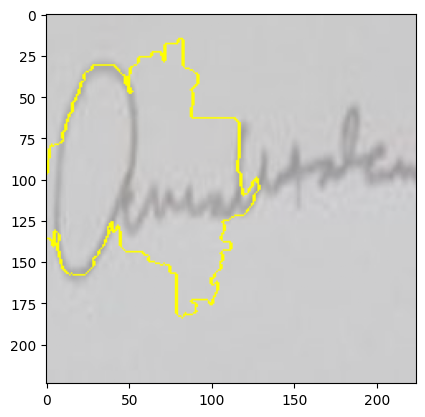

In [20]:
# Import the mark_boundaries function
from skimage.segmentation import mark_boundaries

# Display the image and its explanation
temp, mask = explanation.get_image_and_mask(predicted_class, positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()
